*This notebook was created by Sergey Tomin (sergey.tomin@desy.de). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). April 2020.*

# An Introduction to Ocelot

Ocelot is a multiphysics simulation toolkit designed for studying FEL and storage ring based light sources. Ocelot is written in Python. Its central concept is the writing of python's scripts for simulations with the usage of Ocelot's modules and functions and the standard Python libraries. 

Ocelot includes following main modules:

* **Charged particle beam dynamics module (CPBD)**
    - optics
    - tracking
    - matching
    - collective effects (description can be found [here](http://vrws.de/ipac2017/papers/wepab031.pdf) and [here](https://journals.aps.org/prab/abstract/10.1103/PhysRevAccelBeams.22.024401)) 
        - Space Charge (3D Laplace solver) 
        - CSR (Coherent Synchrotron Radiation) (1D model with arbitrary number of dipoles).
        - Wakefields (Taylor expansion up to second order for arbitrary geometry).
    - MOGA (Multi Objective Genetics Algorithm) [ref](http://accelconf.web.cern.ch/AccelConf/ipac2016/papers/thpmb034.pdf).
* **Native module for spontaneous radiation calculation** (some details can be found [here](http://accelconf.web.cern.ch/AccelConf/ipac2019/papers/wepts017.pdf) and [here](http://scripts.iucr.org/cgi-bin/paper?S1600577519002509))
* **FEL calculations: interface to GENESIS and pre/post-processing**
* **Modules for online beam control and online optimization of accelerator performances.**   [ref1](http://accelconf.web.cern.ch/accelconf/IPAC2014/papers/mopro086.pdf), [ref2](https://jacowfs.jlab.org/conf/y15/ipac15/prepress/TUPWA037.PDF), [ref3](http://accelconf.web.cern.ch/AccelConf/ipac2016/papers/wepoy036.pdf), [ref4](https://arxiv.org/pdf/1704.02335.pdf).
    - This module is being developed in collaboration with other accelerator groups. The module has been migrated to a separate [repository](https://github.com/ocelot-collab/optimizer) (in [ocelot-collab](https://github.com/ocelot-collab) organization) for ease of collaborative development.

Ocelot extensively  uses Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python and give you access to various mathematical and optimization techniques and algorithms. To produce high quality figures Python's [matplotlib](http://matplotlib.org/index.html) library is used.

It is an open source project and it is being developed by physicists from  [The European XFEL](http://www.xfel.eu/), [DESY](http://www.desy.de/) (Germany), [NRC Kurchatov Institute](http://www.nrcki.ru/) (Russia).

We still have no documentation but you can find a lot of examples in /demos/ folder including this tutorial


## Ocelot user profile

Ocelot is designed for researchers who want to have the flexibility that is given by high-level languages such as Matlab, Python (with Numpy and SciPy) or Mathematica.
However if someone needs a GUI  it can be developed using Python's libraries like a [PyQtGraph](http://www.pyqtgraph.org/) or [PyQt](http://pyqt.sourceforge.net/Docs/PyQt4/). 

For example, you can see GUI for SASE optimization (uncomment and run next block)

In [1]:
from IPython.display import Image
# Image(filename='gui_example.png')

## Tutorials
* Preliminaries: Setup & introduction

#### Beam dynamics

* [Introduction. Tutorial N1. Linear optics.](#tutorial1). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/1_introduction.ipynb).
    - Linear optics. Double Bend Achromat (DBA). Simple example of usage OCELOT functions to get periodic solution for a storage ring cell. 
* [Tutorial N2. Tracking.](2_tracking.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/2_tracking.ipynb).
    - Linear optics of the European XFEL Injector. 
    - Tracking. First and second order. 
    - Artificial beam matching - BeamTransform
* [Tutorial N3. Space Charge.](3_space_charge.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/3_space_charge.ipynb).
    - Tracking through RF cavities with SC effects and RF focusing.
* [Tutorial N4. Wakefields.](4_wake.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/4_wake.ipynb).
    - Tracking through corrugated structure (energy chirper) with Wakefields
* [Tutorial N5. CSR.](5_CSR.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/5_CSR.ipynb).
    - Tracking trough bunch compressor with CSR effect.
* [Tutorial N6. RF Coupler Kick.](6_coupler_kick.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/6_coupler_kick.ipynb).
    - Coupler Kick. Example of RF coupler kick influence on trajectory and optics.
* [Tutorial N7. Lattice design.](7_lattice_design.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/7_lattice_design.ipynb).
    - Lattice design, twiss matching, twiss backtracking 
* [Tutorial N8. Physics process addition. Laser heater](8_laser_heater.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/8_laser_heater.ipynb).
    - Theory of Laser Heater, implementation of new Physics Process, track particles w/o laser heater effect.   
* [Tutorial N9. Simple accelerator based THz source](9_thz_source.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/9_thz_source.ipynb).
    - A simple accelerator with the electron beam formation system and an undulator to generate THz radiation. 
    
#### Photon field simulation 

* [PFS tutorial N1. Synchrotron radiation module](pfs_1_synchrotron_radiation.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/pfs_1_synchrotron_radiation.ipynb).
    - Simple examples how to calculate synchrotron radiation with OCELOT Synchrotron Radiation Module.
* [PFS tutorial N2. Coherent radiation module and RadiationField object](pfs_2_radiation_field.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/pfs_2_radiation_field.ipynb).
* [PFS tutorial N3. Reflection from imperfect highly polished mirror](pfs_3_imperfect_mirror.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/pfs_3_imperfect_mirror.ipynb).
* [PFS tutorial N4. Converting synchrotron radiation Screen object to RadiationField object for viewing and propagation](pfs_4_synchrotron_radiation_visualization.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/pfs_4_synchrotron_radiation_visualization.ipynb).
* [PFS tutorial N5: SASE estimation and imitation](pfs_5_SASE_Estimator_and_Imitator.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/pfs_5_SASE_Estimator_and_Imitator.ipynb).

### Appendixes
* [Undulator matching](undulator_matching.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/undulator_matching.ipynb).
    - brief theory and example in OCELOT
* [Some useful OCELOT functions](small_useful_features.ipynb). [Web version](http://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/dev/demos/ipython_tutorials/small_useful_features.ipynb)
    - Aperture
    - Losses along accelerator lattice
    - RK tracking
    - Dump the beam distribution at a specific location of the lattice
    - Energy jitter. Or simulation of the jitter in the RF parameters.
    - Get Twiss paremeters from the beam slice
* [Example of an accelerator section optimization](accelerator_optim.ipynb). [Web version](https://nbviewer.jupyter.org/github/ocelot-collab/ocelot/blob/master/demos/ipython_tutorials/accelerator_optim.ipynb)
    - A simple demo of accelerator section optimization with a standard scipy numerical optimization method. 

## Preliminaries

The tutorial includes 9 examples dedicated to the beam dynamics and optics and 5 to Photon Field Simulation module. However, you should have a basic understanding of Computer Programming terminologies. A basic understanding of Python language is a plus.

##### This tutorial requires the following packages:

- Python 3.6 - 3.9
- `numpy` version 1.8 or later: http://www.numpy.org/
- `scipy` version 0.15 or later: http://www.scipy.org/
- `matplotlib` version 3.3 or later: http://matplotlib.org/
- `pandas` :https://pandas.pydata.org
- `h5py` : https://www.h5py.org
- `ipython` version 2.4 or later, with notebook support: http://ipython.org

**Optional** to speed up python 
- numexpr (version 2.6.1)
- pyfftw (version 0.10)
- numba 

The easiest way to get these is to download and install the [Anaconda software distribution](https://www.continuum.io/).

Alternatively, you can download and install [miniconda](http://conda.pydata.org/miniconda.html).
The following command will install all required packages:
```
$ conda install numpy scipy matplotlib jupyter
```

## Ocelot installation
##### Anaconda Cloud
The easiest way to install OCELOT is to use Anaconda cloud. In that case use command:
    ```
    $ conda install -c ocelot-collab ocelot
    ```
##### Explicit installation
Another way is download ocelot from [GitHub](https://github.com/ocelot-collab/ocelot)
1. you have to download from GitHub [zip file](https://github.com/ocelot-collab/ocelot/archive/master.zip).
2. Unzip ocelot-master.zip to your working folder **/your_working_dir/**.
3. Add **../your_working_dir/ocelot-master** to PYTHONPATH
    - **Windows 7:** go to Control Panel -> System and Security -> System -> Advance System Settings -> Environment Variables.
    and in User variables add **/your_working_dir/ocelot-master/** to PYTHONPATH. If variable PYTHONPATH does not exist, create it

    Variable name: PYTHONPATH

    Variable value: ../your_working_dir/ocelot-master/
    - Linux:
    ```
    $ export PYTHONPATH=/your_working_dir/ocelot-master:$PYTHONPATH
    ```
    
#### To launch "ipython notebook" or "jupyter notebook"
in command line run following commands:

```
$ ipython notebook
```

or
```
$ ipython notebook --notebook-dir="path_to_your_directory"
```

or
```
$ jupyter notebook --notebook-dir="path_to_your_directory"
```

### Checking your installation

You can run the following code to check the versions of the packages on your system:

(in IPython notebook, press `shift` and `return` together to execute the contents of a cell)

In [1]:
import sys
sys.path.append("/Users/tomins/Nextcloud/DESY/repository/ocelot")
import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import ocelot
print('ocelot:', ocelot.__version__)

IPython: 8.14.0
numpy: 1.24.4
scipy: 1.11.0
matplotlib: 3.7.1
initializing ocelot...
ocelot: 22.12.0


<a id="tutorial1"></a>
## Tutorial N1. Double Bend Achromat.

We designed a simple lattice to demonstrate the basic concepts and syntax of the optics functions calculation. 
Also, we chose DBA to demonstrate the periodic solution for the optical functions calculation. 

In [2]:
from __future__ import print_function

# the output of plotting commands is displayed inline within frontends, 
# directly below the code cell that produced it
%matplotlib inline

# import from Ocelot main modules and functions
from ocelot import *

# import from Ocelot graphical modules
from ocelot.gui.accelerator import *

## Creating lattice
Ocelot has following elements: Drift, Quadrupole, Sextupole, Octupole, Bend, SBend, RBend, Edge, Multipole, Hcor, Vcor, Solenoid, Cavity, Monitor, Marker, Undulator. 

In [3]:
# defining of the drifts
D1 = Drift(l=2.)
D2 = Drift(l=0.6)
D3 = Drift(l=0.3)
D4 = Drift(l=0.7)
D5 = Drift(l=0.9)
D6 = Drift(l=0.2)

# defining of the quads
Q1 = Quadrupole(l=0.4, k1=-1.3)
Q2 = Quadrupole(l=0.8, k1=1.4)
Q3 = Quadrupole(l=0.4, k1=-1.7)
Q4 = Quadrupole(l=0.5, k1=1.3)

# defining of the bending magnet
B = Bend(l=2.7, k1=-.06, angle=2*pi/16., e1=pi/16., e2=pi/16.)

# defining of the sextupoles
SF = Sextupole(l=0.01, k2=1.5) #random value
SD = Sextupole(l=0.01, k2=-1.5) #random value

# cell creating
cell = (D1, Q1, D2, Q2, D3, Q3, D4, B, D5, SD, D5, SF, D6, Q4, D6,
        SF, D5, SD, D5, B, D4, Q3, D3, Q2, D2, Q1, D1)

In [4]:
cell

(<Drift: name=ID_11268828_ at 0x1ab5d0d60>,
 <Quadrupole: name=ID_46483406_ at 0x1ab5d0c40>,
 <Drift: name=ID_35831642_ at 0x1ab5d0d00>,
 <Quadrupole: name=ID_9833191_ at 0x1ab5d0bb0>,
 <Drift: name=ID_36805976_ at 0x1ab5d0dc0>,
 <Quadrupole: name=ID_78118166_ at 0x1ab5d0c10>,
 <Drift: name=ID_70846865_ at 0x1ab5d0e80>,
 <Bend: name=ID_92481255_ at 0x1ab5d2e50>,
 <Drift: name=ID_66979639_ at 0x1ab5d0f10>,
 <Sextupole: name=ID_1052704_ at 0x1ab5d2f40>,
 <Drift: name=ID_66979639_ at 0x1ab5d0f10>,
 <Sextupole: name=ID_87281295_ at 0x1ab5d2ee0>,
 <Drift: name=ID_10543023_ at 0x1ab5d0fa0>,
 <Quadrupole: name=ID_68161085_ at 0x1ab5d2dc0>,
 <Drift: name=ID_10543023_ at 0x1ab5d0fa0>,
 <Sextupole: name=ID_87281295_ at 0x1ab5d2ee0>,
 <Drift: name=ID_66979639_ at 0x1ab5d0f10>,
 <Sextupole: name=ID_1052704_ at 0x1ab5d2f40>,
 <Drift: name=ID_66979639_ at 0x1ab5d0f10>,
 <Bend: name=ID_92481255_ at 0x1ab5d2e50>,
 <Drift: name=ID_70846865_ at 0x1ab5d0e80>,
 <Quadrupole: name=ID_78118166_ at 0x1ab5d0c1

*hint: to see a simple description of the function put cursor inside () and press **Shift-Tab** or you can type sign **?** before function. To extend dialog window press **+** *
Also, one can get more info about element just using ```print(element)```

In [5]:
print(B)

Bend(l=2.70000, angle=3.926991e-01, e1=1.963495e-01, e2=1.963495e-01, eid="ID_92481255_")


The cell is a list of the simple objects which contain a physical information of lattice elements such as length, strength, voltage and so on. In order to create a transport map for every element and bind it with lattice object we have to create new Ocelot object - MagneticLattice() which makes these things automatically. 

MagneticLattice(sequence, start=None, stop=None, method=MethodTM()):     
* sequence - list of the elements,

other parameters we will consider in tutorial N2. 

In [6]:
lat = MagneticLattice(cell)

# to see total lenth of the lattice 
print("length of the cell: ", lat.totalLen, "m")

length of the cell:  20.34 m


### Optical function calculation
Uses: 
* twiss() function and,
* Twiss() object contains twiss parameters and other information at one certain position (s) of lattice

To calculate twiss parameters you have to run **twiss(lattice, tws0=None, nPoints=None)** function. If you want to get a periodic solution leave tws0 by default. 

You can change the number of points over the cell, If nPoints=None, then twiss parameters are calculated at the end of each element.
twiss() function returns list of Twiss() objects.

##### You will see the Twiss object contains more information than just twiss parameters. 

In [7]:
tws = twiss(lat, nPoints=1000)

# to see twiss paraments at the begining of the cell, uncomment next line
# print(tws[0])
print("length = ", len(tws))
# to see twiss paraments at the end of the cell, uncomment next line
print(tws[998] == tws[-1])

length =  1000
False


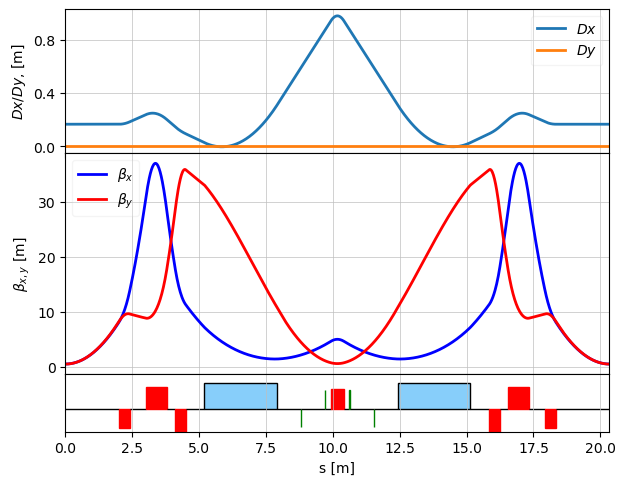

In [10]:
# plot optical functions.
plot_opt_func(lat, tws, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

# you also can use standard matplotlib functions for plotting
#s = [tw.s for tw in tws]
#bx = [tw.beta_x for tw in tws]
#plt.plot(s, bx)
#plt.show()

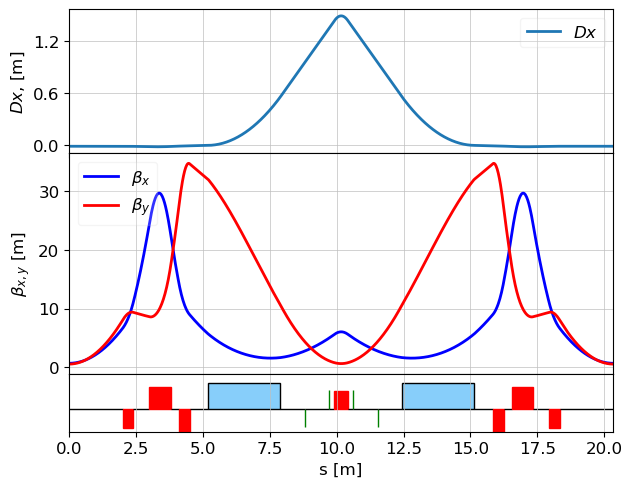

In [11]:
# you can play with quadrupole strength and try to make achromat
Q4.k1 = 1.18

# to make achromat uncomment next line
# Q4.k1 =  1.18543769836
# To use matching function, please see ocelot/demos/ebeam/dba.py 

# updating transfer maps after changing element parameters. 
lat.update_transfer_maps()

# recalculate twiss parameters 
tws=twiss(lat, nPoints=1000)

plot_opt_func(lat, tws, legend=False)
plt.show()

In [48]:
d = Drift(l=1)
qf = Quadrupole(l=0.2, k1=0.3)
qd = Quadrupole(l=0.2, k1=-0.3)
cell = (d, qf, d, qd, d)
lat = MagneticLattice(cell)
tws0 = Twiss()
tws0.beta_x = 10
tws0.beta_y = 10

tws = twiss(lat, tws0=tws0, attach2elem=True)
print(qd.tws)


emit_x  = 0.0
emit_y  = 0.0
beta_x  = 9.148770124928424
beta_y  = 12.0971088761053
alpha_x = -0.21066774123572463
alpha_y = -0.18457428267219375
gamma_x = 0.11415533267708299
gamma_y = 0.08548056204292641
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.24582756972863015
muy     = 0.2266636181488889
nu_x    = 0.039124672870579066
nu_y    = 0.03607463524748951
E       = 0.0
s        = 2.4000000000000004



emit_x  = 0.0
emit_y  = 0.0
beta_x  = 33.09417032395688
beta_y  = 36.43155958891432
alpha_x = 0.0
alpha_y = 5.675938272265563e-16
gamma_x = 0.030216802240728775
gamma_y = 0.027448728829722893
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 0.0
muy     = 0.0
nu_x    = 0.0
nu_y    = 0.0
E       = 0.005
s        = 0.0



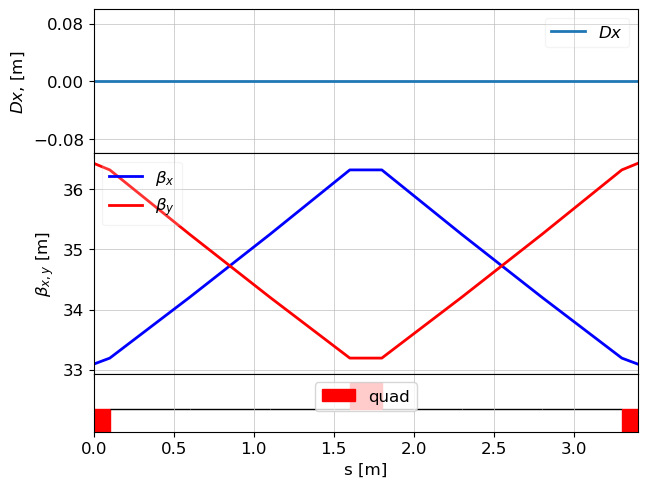

In [10]:
d2 = Drift(l=0.5)
qf = Quadrupole(l=0.2, k1=0.3)
qdh = Quadrupole(l=0.2/2, k1=-0.3)
c = Drift(l=0.5)#Cavity(l=0.5, v=0.01, freq=1.3e9,phi=0)
cell = (qdh, d2, c, d2, qf, d2,c,d2, qdh)
lat = MagneticLattice(cell)

tws0 = Twiss()
tws0.E = 0.005
tws0.beta_x  = 10
tws0.beta_y  = 10
tw_p = lat.periodic_twiss(tws=Twiss(E=0.005))
tws = twiss(lat, tw_p)
print(tw_p)
plot_opt_func(lat, tws)
plt.show()

#res = match(lat, constr={"periodic":True}, vars = [[tws0, 'beta_x'], [tws0, 'beta_y'], 
#                                                   [tws0, 'alpha_x'], [tws0, 'alpha_y']],
#           tw=tws0)
#res

In [53]:
from scipy.optimize import *
def errf(x):
    tws0.beta_x, tws0.beta_y, tws0.alpha_x, tws0.alpha_y = x
    tws = twiss(lat, tws0)
    tws1 = tws[-1]
    err = np.sqrt((tws1.beta_x - tws0.beta_x)**2 + (tws1.beta_y - tws0.beta_y)**2 + 
                  (tws1.alpha_x - tws0.alpha_x)**2 + (tws1.alpha_y - tws0.alpha_y)**2)
    return err
x = [tws0.beta_x, tws0.beta_y, tws0.alpha_x, tws0.alpha_y]
res = fmin(errf, x, xtol=1e-7, maxiter=1000, maxfun=1000)
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 141
         Function evaluations: 227
[-1.6003183   1.8790818   0.88824526 -0.95905856]


emit_x  = 0.0
emit_y  = 0.0
beta_x  = -1.6003183455882075
beta_y  = 1.8790818434257495
alpha_x = 0.8882452793858189
alpha_y = -0.9590585884462675
gamma_x = -1.1178898756507352
gamma_y = 1.021665651652818
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 25.992478435765722
muy     = 2.301441599416175
nu_x    = 4.136831426261611
nu_y    = 0.3662858067844019
E       = 0.025
s        = 3.4



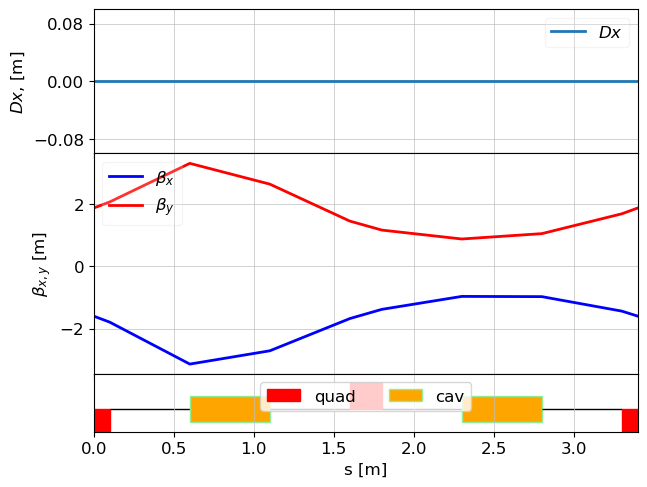

In [51]:
tw_p = Twiss()
tw_p.beta_x, tw_p.beta_y, tw_p.alpha_x, tw_p.alpha_y = res
tw_p.E = tws0.E
tws = twiss(lat, tw_p)
print(tws[-1])
plot_opt_func(lat, tws)
plt.show()

In [12]:
R66 = 0.02426261
gamma0 = 0.005/m_e_GeV
g1 = np.sqrt(gamma0**2 - 1 + R66**2)/R66


print(g1* m_e_GeV)

print(np.sqrt(-1 + 0j))

0.20499999489412718
1j


In [9]:
isinstance(tws0, (Twiss, Drift))

True

In [ ]:
def writeUndulator(ele):
        # Note that the value of p0 is given in eV
        p0=ele.p0/511000
        print(ele.Name,p0,ele.K)
        kmax=ele.K*ele.ku/p0
        kx=ele.kx*0.5*kmax*kmax
        ky=ele.ky*0.5*kmax*kmax
        if kx>0:
            omg=np.sqrt(kx)*ele.Length
            m11=np.cos(omg)
            m12=np.sin(omg)/np.sqrt(kx)
            m21=-np.sin(omg)*np.sqrt(kx)
            m22=np.cos(omg)
        else:
            if kx<0:
                omg=np.sqrt(kx)*ele.Length
                m11=np.cosh(omg)
                m12=np.sinh(omg)/np.sqrt(kx)
                m21=np.sinh(omg)*np.sqrt(kx)
                m22=np.cosh(omg)
            else:
                m11=1
                m12=ele.Length
                m21=0
                m22=1  
        print("%s: MATRIX, L=%f,\n" % (ele.Name, ele.Length))
        print("   RM11=%f,\n" % (m11))  
        print("   RM12=%f,\n" % (m12))  
        print("   RM21=%f,\n" % (m21))  
        print("   RM22=%f,\n" % (m22))
        if ky>0:
            omg=np.sqrt(ky)*ele.Length
            m11=np.cos(omg)
            m12=np.sin(omg)/np.sqrt(ky)
            m21=-np.sin(omg)*np.sqrt(ky)
            m22=np.cos(omg)
        else:
            if ky<0:  
                omg=math.sqrt(ky)*ele.Length
                m11=math.cosh(omg)
                m12=math.sinh(omg)/math.sqrt(ky)
                m21=math.sinh(omg)*math.sqrt(ky)
                m22=math.cosh(omg)
            else:
                m11=1
                m12=ele.Length
                m21=0
                m22=1  
        print("   RM33=%f,\n" % (m11))  
        print("   RM34=%f,\n" % (m12))  
        print("   RM43=%f,\n" % (m21))  
        print("   RM44=%f;\n" % (m22))  